In [22]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
G = nx.DiGraph()
df = pd.read_csv('2024.csv')
week_num = 19

df['cost'] = (df['Home Score'] - df['Away Score'])

last_three = [week_num-3,week_num-2,week_num-1]

week_1_df = df[df['Wk'].isin(last_three)]
edgelist = list(zip(week_1_df['Home'], week_1_df['Away'], week_1_df['cost']))

mod_edgelist = []
for t in edgelist:
    if t[2] < 0:
        modified_tuple = (t[0], t[1], round(abs(t[2]), 2))
    else:
        modified_tuple = (t[1], t[0], round(t[2], 2))

    mod_edgelist.append(modified_tuple)


nodelist = pd.unique(df['Home'])
# Assuming week_1_df is a pandas DataFrame with columns 'Home', 'Away', and 'cost'
weightlist = dict(zip(zip(mod_edgelist[0], mod_edgelist[1]), mod_edgelist[2]))


for team1, team2, weight in mod_edgelist:
    G.add_edge(team1, team2, weight=weight)
    # G.add_edge(team2, team1, weight=-weight)


edge_labels = nx.get_edge_attributes(G, 'weight')

In [24]:
incoming_weights = {
    node: sum(data['weight'] for _, _, data in G.in_edges(node, data=True))
    for node in G.nodes
}
print(incoming_weights)

{'Crystal Palace': 0, 'Liverpool': 1, 'Manchester Utd': 0, 'Bournemouth': 5, "Nott'ham Forest": 0, 'Wolves': 1, 'Burnley': 2, 'Brighton': 0, 'Brentford': 0, 'Sheffield Utd': 1, 'Arsenal': 2, 'Aston Villa': 2, 'Chelsea': 2, 'Everton': 4, 'West Ham': 5, 'Fulham': 5, 'Luton Town': 1, 'Manchester City': 2, 'Newcastle Utd': 3, 'Tottenham': 6}


In [25]:
rankings = {}

incoming_weights = {
    node: sum(data['weight'] for _, _, data in G.in_edges(node, data=True))
    for node in G.nodes
}

sorted_by_value = dict(sorted(incoming_weights.items(), key=lambda item: item[1], reverse=True))


for i, (key, value) in enumerate(incoming_weights.items(), start=1):
    rankings[key] = i

In [26]:
rankings

{'Crystal Palace': 1,
 'Liverpool': 2,
 'Manchester Utd': 3,
 'Bournemouth': 4,
 "Nott'ham Forest": 5,
 'Wolves': 6,
 'Burnley': 7,
 'Brighton': 8,
 'Brentford': 9,
 'Sheffield Utd': 10,
 'Arsenal': 11,
 'Aston Villa': 12,
 'Chelsea': 13,
 'Everton': 14,
 'West Ham': 15,
 'Fulham': 16,
 'Luton Town': 17,
 'Manchester City': 18,
 'Newcastle Utd': 19,
 'Tottenham': 20}

In [30]:
def project_winner(row):
    home_rank = rankings.get(row["Home"], float('inf'))
    away_rank = rankings.get(row["Away"], float('inf'))
    
    # Project a tie if the ranks are within 3 spots
    if abs(home_rank - away_rank) <= 2:
        return "Draw"
    elif home_rank > away_rank:
        return "Home"
    else:
        return "Away"

In [31]:
test_week = df[df['Wk'].isin([20])]
test_week["Projected Winner"] = test_week.apply(project_winner, axis=1)
correct_predictions = (test_week["Projected Winner"] == test_week["Winner"]).sum()
total_predictions = len(test_week)
accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy of projected winners: {accuracy:.2f}%")

Accuracy of projected winners: 40.00%


C:\Users\jacob.hyatt\AppData\Local\Temp\ipykernel_23920\1277970143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_week["Projected Winner"] = test_week.apply(project_winner, axis=1)


In [32]:
test_week

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,MatchReportURL,id,Home Score,Away Score,Winner,cost,Projected Winner
188,20.0,Sat,2023-12-30,12:30,Luton Town,2.3,2–3,1.5,Chelsea,11041.0,Kenilworth Road Stadium,Paul Tierney,https://fbref.com/en/matches/8e04572c/Luton-To...,188,2,3,Away,-1,Home
189,20.0,Sat,2023-12-30,15:00,Aston Villa,3.2,3–2,1.2,Burnley,41613.0,Villa Park,Stuart Attwell,https://fbref.com/en/matches/2828c5bc/Aston-Vi...,189,3,2,Home,1,Home
190,20.0,Sat,2023-12-30,15:00,Wolves,1.9,3–0,0.4,Everton,31639.0,Molineux Stadium,Thomas Bramall,https://fbref.com/en/matches/7dfc59ca/Wolverha...,190,3,0,Home,3,Away
191,20.0,Sat,2023-12-30,15:00,Manchester City,2.2,2–0,0.3,Sheffield Utd,53108.0,Etihad Stadium,David Coote,https://fbref.com/en/matches/aefd7405/Manchest...,191,2,0,Home,2,Home
192,20.0,Sat,2023-12-30,15:00,Crystal Palace,1.0,3–1,1.4,Brentford,25472.0,Selhurst Park,Robert Jones,https://fbref.com/en/matches/e9d5dd9b/Crystal-...,192,3,1,Home,2,Away
193,20.0,Sat,2023-12-30,17:30,Nott'ham Forest,0.7,2–1,0.8,Manchester Utd,29529.0,The City Ground,Tim Robinson,https://fbref.com/en/matches/1aa68cba/Nottingh...,193,2,1,Home,1,Draw
194,20.0,Sun,2023-12-31,14:00,Tottenham,2.3,3–1,1.7,Bournemouth,61780.0,Tottenham Hotspur Stadium,Simon Hooper,https://fbref.com/en/matches/3ab71352/Tottenha...,194,3,1,Home,2,Home
195,20.0,Sun,2023-12-31,14:00,Fulham,1.2,2–1,1.6,Arsenal,24444.0,Craven Cottage,Joshua Smith,https://fbref.com/en/matches/6c1b6ffc/Fulham-A...,195,2,1,Home,1,Home
196,20.0,Mon,2024-01-01,20:00,Liverpool,7.0,4–2,0.6,Newcastle Utd,57471.0,Anfield,Anthony Taylor,https://fbref.com/en/matches/107b2d79/Liverpoo...,196,4,2,Home,2,Away
197,20.0,Tue,2024-01-02,19:30,West Ham,0.7,0–0,2.3,Brighton,62462.0,London Stadium,Samuel Barrott,https://fbref.com/en/matches/d557afd0/West-Ham...,197,0,0,Draw,0,Home


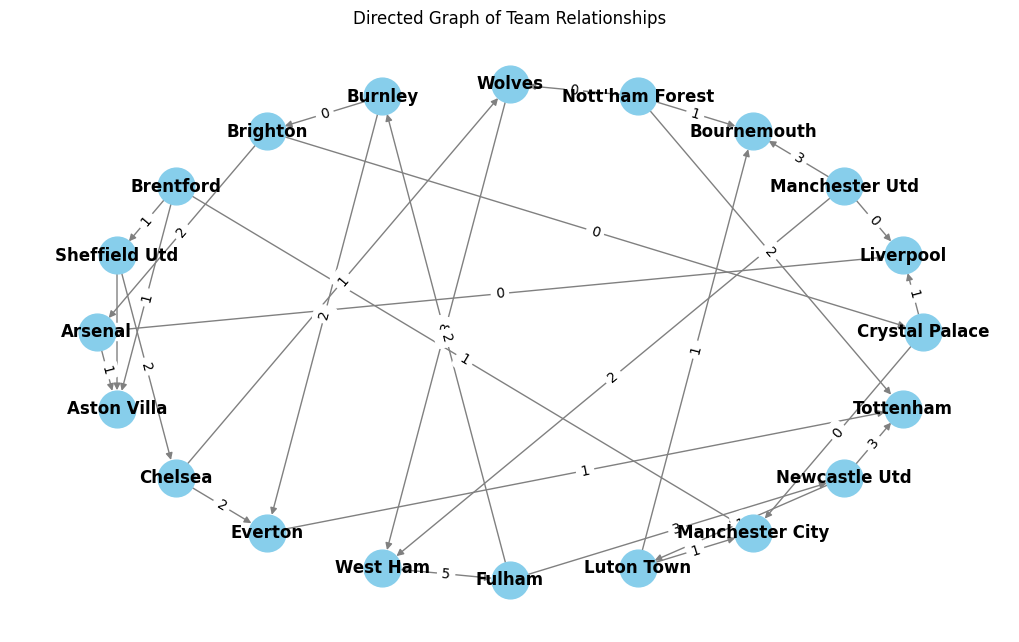

In [33]:
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 6))

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=12, font_color='black', font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Directed Graph of Team Relationships")
plt.show()